In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pickle
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, LSTM
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
data_folder = '/content/gdrive/MyDrive/University/master/term1/Machine-Learning/ML-Project/Data/'

In [4]:
SHAPE_SIZE = (862, 20)

In [5]:
file_name  = data_folder + "mfccaudio_mfcc_features_20_all_20Sec_cleaned_Amin.pkl"
file_name_labels  = data_folder + "mfccaudio_mfcc_features_20_all_20Sec_labels_cleaned_Amin.pkl"
with open(file_name, 'rb') as file:
    uncleaned_data = pickle.load(file)

with open(file_name_labels, 'rb') as file:
    uncleaned_labels = pickle.load(file)
np.shape(uncleaned_data), np.shape(uncleaned_labels)

((9538, 862, 20), (9538,))

In [6]:
np.shape(uncleaned_data[0])

(862, 20)

In [7]:
data = []
labels = []
for k, j in zip(uncleaned_data,uncleaned_labels):
    if np.shape(k) != SHAPE_SIZE:
        print(np.shape(k))
    else:
        data.append(k)
        labels.append(j)
labels = np.array(labels)
data = np.array(data)
np.shape(data), np.shape(labels)

((9538, 862, 20), (9538,))

In [8]:
np.unique(uncleaned_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [9]:
import numpy
a = numpy.array(uncleaned_labels)
unique, counts = numpy.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 1254, 1: 1264, 2: 1432, 3: 1476, 4: 1215, 5: 1514, 6: 1383}

In [10]:
labels = to_categorical(labels)
x_train, x_test, y_train, y_test =  train_test_split(data, labels, test_size=0.2, shuffle=True, random_state=42, stratify=labels)

In [11]:
np.shape(x_train), np.shape(y_train)

((7630, 862, 20), (7630, 7))

In [12]:
class Trainer:
    def __init__(self, x_train, y_train, number_of_class=7 ,input_size=None, epochs=1000, optimizer='adam'):
        self.input_size = input_size
        self.model = Sequential()
        self.x_train, self.y_train = x_train, y_train
        self.epochs = epochs
        self.optimizer = optimizer
        self.number_of_class = number_of_class
        self.callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
    # define cnn model
    def define_model(self):
        print("Build LSTM RNN model ...")
        self.model = Sequential()

        self.model.add(LSTM(units=128, dropout=0.5, return_sequences=True, input_shape=self.input_size))
        self.model.add(LSTM(units=32,  dropout=0.5, return_sequences=False))
        self.model.add(Dense(units=self.number_of_class, activation="softmax"))
        self.model.compile(optimizer=self.optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
        return self.model.summary()

    def fit_model(self):
        # fit model
        self.history = self.model.fit(self.x_train, self.y_train, epochs=self.epochs, batch_size=128,
                                      validation_split=0.2, verbose=1,shuffle=True, 
                                      callbacks=[self.callback])

    def plot_history(self):
        fig = plt.figure(figsize=(12, 4))
        metrics = ['loss', 'accuracy']
        for n, metric in enumerate(metrics):
            plt.subplot(1, 2, n + 1)
            plt.plot(self.history.epoch, self.history.history[metric], label='Train')
            plt.plot(self.history.epoch, self.history.history[f"val_{metric}"], linestyle="--", label='Validation')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.title(metric)
        plt.legend()
        plt.show()

    def evaluate(self, x_test, y_test):
        y_pred = np.argmax(self.model.predict(x_test), axis=-1)
        print(classification_report(np.argmax(y_test, axis=-1), y_pred, digits=3))



In [13]:
trainer = Trainer(x_train, y_train, input_size = SHAPE_SIZE, epochs=1000)
trainer.define_model()

Build LSTM RNN model ...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 862, 128)          76288     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 7)                 231       
                                                                 
Total params: 97,127
Trainable params: 97,127
Non-trainable params: 0
_________________________________________________________________


In [14]:
trainer.fit_model()

Epoch 1/1000
48/48 [==============================] - 13s 121ms/step - loss: 1.9554 - accuracy: 0.1627 - val_loss: 1.9468 - val_accuracy: 0.1691
Epoch 2/1000
48/48 [==============================] - 4s 87ms/step - loss: 1.9251 - accuracy: 0.1904 - val_loss: 1.9381 - val_accuracy: 0.1959
Epoch 3/1000
48/48 [==============================] - 4s 86ms/step - loss: 1.9024 - accuracy: 0.2144 - val_loss: 1.9157 - val_accuracy: 0.2169
Epoch 4/1000
48/48 [==============================] - 5s 104ms/step - loss: 1.8827 - accuracy: 0.2284 - val_loss: 1.9176 - val_accuracy: 0.2235
Epoch 5/1000
48/48 [==============================] - 4s 91ms/step - loss: 1.8562 - accuracy: 0.2511 - val_loss: 1.9056 - val_accuracy: 0.2346
Epoch 6/1000
48/48 [==============================] - 4s 86ms/step - loss: 1.8536 - accuracy: 0.2511 - val_loss: 1.9016 - val_accuracy: 0.2457
Epoch 7/1000
48/48 [==============================] - 4s 86ms/step - loss: 1.8299 - accuracy: 0.2770 - val_loss: 1.8675 - val_accuracy: 0.2

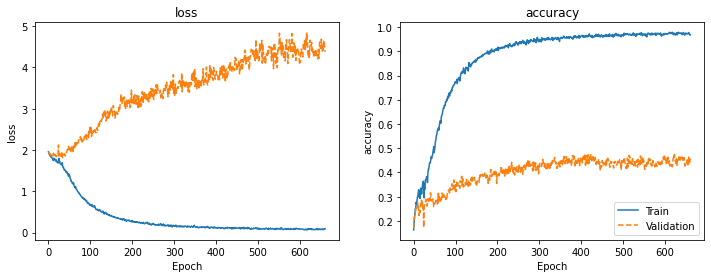

In [15]:
trainer.plot_history()

In [16]:
trainer.evaluate(x_test, y_test)

60/60 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

           0      0.420     0.378     0.398       251
           1      0.442     0.573     0.499       253
           2      0.599     0.287     0.388       286
           3      0.380     0.454     0.414       295
           4      0.464     0.370     0.412       243
           5      0.469     0.449     0.459       303
           6      0.447     0.614     0.518       277

    accuracy                          0.447      1908
   macro avg      0.460     0.446     0.441      1908
weighted avg      0.461     0.447     0.441      1908



In [17]:
trainer.evaluate(x_train, y_train)

239/239 [==============================] - 5s 22ms/step
              precision    recall  f1-score   support

           0      0.473     0.419     0.444      1003
           1      0.476     0.619     0.538      1011
           2      0.637     0.291     0.400      1146
           3      0.444     0.568     0.499      1181
           4      0.516     0.449     0.480       972
           5      0.491     0.460     0.475      1211
           6      0.494     0.632     0.555      1106

    accuracy                          0.491      7630
   macro avg      0.505     0.491     0.484      7630
weighted avg      0.505     0.491     0.484      7630

